In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
# Reading the csv file
Data = pd.read_csv('titanic-passengers-Clean.csv')

In [3]:
# First 5 rows of the dataset
Data.head()

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,C,Q,S
0,0,0,2,28.0,0,0,13.0000,1,0,0,1
1,1,0,3,25.0,0,0,7.6500,1,0,0,1
2,2,0,3,20.0,0,0,7.8542,1,0,0,1
3,3,0,3,29.0,0,4,21.0750,0,0,0,1
4,4,0,1,31.0,1,0,52.0000,1,0,0,1


In [4]:
# Dropping unknown column
Data = Data.drop(['Unnamed: 0'], axis = 1)

In [5]:
# The dataset after cleaning
Data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,C,Q,S
0,0,2,28.0,0,0,13.0000,1,0,0,1
1,0,3,25.0,0,0,7.6500,1,0,0,1
2,0,3,20.0,0,0,7.8542,1,0,0,1
3,0,3,29.0,0,4,21.0750,0,0,0,1
4,0,1,31.0,1,0,52.0000,1,0,0,1


In [6]:
Data['Survived'].value_counts() # Number of survived and unsurvived passengers

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

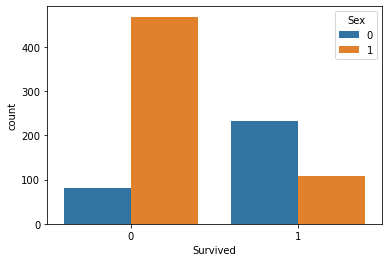

In [7]:
# Plotting survived passengers 
sns.countplot(x = 'Survived', data = Data, hue = 'Sex')

In [8]:
# Dataframe columns 
Data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'C', 'Q',
       'S'],
      dtype='object')

In [9]:
X = Data.drop(['Survived'], axis = 1)
y = Data['Survived']

In [10]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex,C,Q,S
0,2,28.000000,0,0,13.0000,1,0,0,1
1,3,25.000000,0,0,7.6500,1,0,0,1
2,3,20.000000,0,0,7.8542,1,0,0,1
3,3,29.000000,0,4,21.0750,0,0,0,1
4,1,31.000000,1,0,52.0000,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,14.000000,1,0,30.0708,0,1,0,0
887,3,22.000000,0,0,7.2292,1,1,0,0
888,3,30.000000,0,0,8.6625,0,0,0,1
889,3,29.699118,0,0,7.8958,1,0,0,1


In [11]:
y.values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,

In [12]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [13]:
# Creating the classifier object
Gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)

In [14]:
# Building our model
Model = tree.DecisionTreeClassifier()
Model = Model.fit(X_train,y_train) # Fitting our model
Predict = Model.predict(X_test) 

In [23]:
from sklearn.metrics import accuracy_score, classification_report
# Function to calculate accuracy
def Accuracy(y_test, y_pred):
    print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)
    print(classification_report(y_test, Predict))

In [24]:
# Printing our scores
Accuracy(y_test,Predict)

Accuracy :  78.35820895522389
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       155
           1       0.75      0.73      0.74       113

    accuracy                           0.78       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.78      0.78      0.78       268



Error rate = 1 - Accuracy 
= 1 - 0.78 = 0.22 Error rate

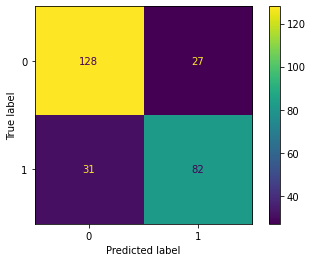

In [25]:
# Plotting a confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Model, X_test, y_test)  
plt.show()  

[Text(322.72823392427887, 530.01, 'X[5] <= 0.5\ngini = 0.465\nsamples = 623\nvalue = [394, 229]'),
 Text(122.17427884615385, 502.83000000000004, 'X[0] <= 2.5\ngini = 0.399\nsamples = 218\nvalue = [60, 158]'),
 Text(78.6923076923077, 475.65000000000003, 'X[4] <= 28.856\ngini = 0.103\nsamples = 110\nvalue = [6, 104]'),
 Text(64.38461538461539, 448.47, 'X[4] <= 28.231\ngini = 0.194\nsamples = 46\nvalue = [5, 41]'),
 Text(57.23076923076923, 421.29, 'X[1] <= 56.0\ngini = 0.162\nsamples = 45\nvalue = [4, 41]'),
 Text(35.769230769230774, 394.11, 'X[1] <= 27.5\ngini = 0.13\nsamples = 43\nvalue = [3, 40]'),
 Text(14.307692307692308, 366.93000000000006, 'X[1] <= 25.5\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(7.153846153846154, 339.75, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(21.461538461538463, 339.75, 'X[2] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(14.307692307692308, 312.57000000000005, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(28.615384615384617

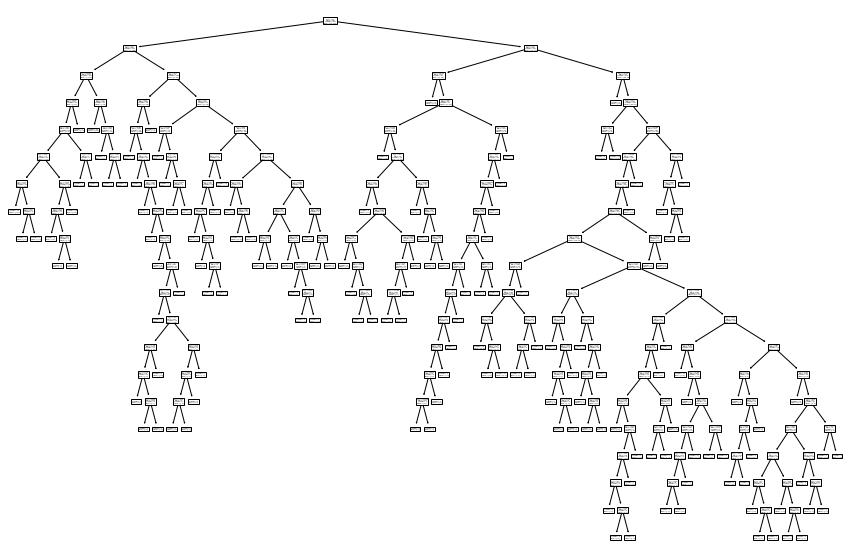

In [17]:
# Plotting the decision tree
plt.figure(figsize=(15,10))
tree.plot_tree(Model)

In [94]:
X = Data.drop(['Survived'], axis = 1)
y = Data['Survived']

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [95]:
# Create a Gaussian Classifier
Model2 = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets 
Model2.fit(X_train,y_train)

Predict2 = Model2.predict(X_test)

In [96]:
# Printing our scores
Accuracy(y_test,Predict2)

Accuracy :  80.59701492537313
              precision    recall  f1-score   support

           0       0.55      0.59      0.57       155
           1       0.38      0.35      0.37       113

    accuracy                           0.49       268
   macro avg       0.47      0.47      0.47       268
weighted avg       0.48      0.49      0.49       268



In [97]:
print("Accuracy:",metrics.accuracy_score(y_test, Predict2))

Accuracy: 0.8059701492537313
